<center><h1> Lab 1: </h1></center>
<center><h1> Introduction to Probabilistic Graphical Models </h1></center>

## Question 0

Numerical Stability of the computation proof:

$s = log\sum_{i=1}^{I} exp(v_i) $, where each $v_i$ < 0 and $|v_i|$ is very large.
We have $$ v_{max} = \max_{i} |v_i| $$
so we can write
$$
log\sum_{i=1}^{I} exp(v_i) = log(\sum_{i} exp(v_i - v_{max} + v_{max}))
$$
$$
 = log(\sum_{i} exp(v_i+v_{max} * exp(-v_{max})))
$$
$$
 = - v_{max} + log(\sum_{i} exp(v_i + v_{max})) 
$$
With $ \sum_{i} exp(v_i + v_{max}) \geq I $
Which provides numerical stability

*An example*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()
np.set_printoptions(precision=3)

In [2]:
%matplotlib inline

In [3]:
def log_sum(v_i):
    v_max = np.max(np.abs(v_i))
    return - v_max + np.log(np.sum(np.exp(v_i + v_max)))

In [4]:
v_i = [-1234, -1235]

In [5]:
print(log_sum(v_i))
np.log(np.sum(np.exp(v_i)))

-1233.6867383124818


-inf

# Question 1

### 1. Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model.
### 2. Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal description above.

In [6]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image

In [7]:
def find_edges(A):
    edges = []
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if(A[i,j] != 0):
                edges.append((j+1,i+1))
    return edges

In [8]:
def state_model(N, epsilon, kappa = 0):
    A = epsilon * np.eye(N)
    for i in range(N):
        A[i,i-1] = 1-epsilon
    # This line of code is to adapt the state transition to the possibility of the 
    # robot being kidnapped at any point and teleported to any position uniformaly
    # at random
    A = A * (1 - kappa) + np.ones((N,N))/N * kappa
    return A

def observation_model(N, w):
    C = (1-w)/float(N) * np.eye(N) + w
    for i in range(N):
        for j in range(N):
            if i != j :
                C[i,j] = (1-w)/float(N)
    return C

#### First Variable <br><br>
The starting position of the robot is defined as the uniform porbability :
$$ 
X_0 = \frac{1}{N} \begin{bmatrix} 
1 \\
1 \\
. \\
.\\. \\1 \\
\end{bmatrix}
$$

#### Second Variable <br>
The state transition model is as follows: <b>(X represents the reel position of the robot)</b>
<br><br>
$$
P \left (X_i \vert X_{i-1} \right) = 1-\epsilon
$$
$$
P \left (X_i \vert X_{i} \right) = \epsilon
$$
State transiton model Matrix is represented as follows: <br><br>
$$ A = \quad
\begin{bmatrix} 
\epsilon & 0 & 0 & . & . & . & 1-\epsilon \\
1-\epsilon & \epsilon & 0 & . & . & . & 0 \\
0 & 1-\epsilon & \epsilon & 0 & . & . & 0 \\
0 & 0 &1-\epsilon & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & . &.&.&0&1-\epsilon&\epsilon
\end{bmatrix}$$

In [9]:
epsilon = 0.5
N = 10
A = state_model(N, epsilon)
print(A)

[[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.5 0.5 0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]]


In [10]:
edges = find_edges(A)
G = nx.MultiDiGraph(edges)
labels = {i : "x_"+str(i) for i in range(1,N+1)}

G = nx.relabel_nodes(G, labels)
G.graph['edge'] = {'arrowsize': '0.6', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}

M = to_agraph(G) 
M.layout('dot')                                                                 
M.draw("State_transiton.png")

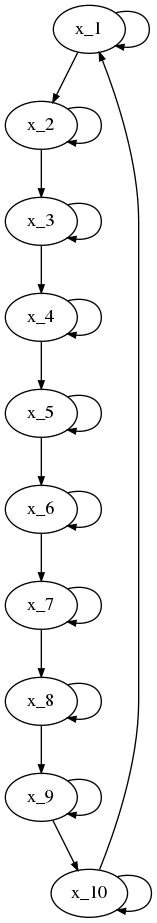

In [11]:
Image("State_transiton.png")

#### Third variable <br>
The observetion model is as follows : <b>(Y represents the position of the robot as detected by the sensor)</b> <br><br>
$$
P \left (Y_i \vert X_{i} \right) = w + \frac{1-w}{K}
$$
$$
P \left (Y_i \vert X_{j} \right) = \frac{1 - w}{K}
$$
The observation model is represented as follows : <br><br>
$$ C = \quad
\begin{bmatrix} 
w + \frac{1-w}{K} & \frac{1-w}{K} & \frac{1-w}{K} & . & . & . & \frac{1-w}{K} \\
\frac{1-w}{K} & w + \frac{1-w}{K} & \frac{1-w}{K} & . & . & . & \frac{1-w}{K} \\
\frac{1-w}{K} & \frac{1-w}{K} & w + \frac{1-w}{K} & \frac{1-w}{K} & . & . & \frac{1-w}{K} \\
\frac{1-w}{K} & \frac{1-w}{K} &\frac{1-w}{K} & w + \frac{1-w}{K}  & . & . & \frac{1-w}{K}\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
\frac{1-w}{K} & . &.&.&\frac{1-w}{K}&\frac{1-w}{K}& w + \frac{1-w}{K}
\end{bmatrix}$$

In [12]:
N = 5
w = 0.5
C = observation_model(N, w)
print(C)

[[0.6 0.1 0.1 0.1 0.1]
 [0.1 0.6 0.1 0.1 0.1]
 [0.1 0.1 0.6 0.1 0.1]
 [0.1 0.1 0.1 0.6 0.1]
 [0.1 0.1 0.1 0.1 0.6]]


In [13]:
# HMM representation
edges = [(i,i+1,{"rep":"$P(X_" + str(i) + "|X_" +str(i+1) + ")$" }) for i in range(1,N)]
edges = edges + [(i+1,i+1+N,{"rep":"$P(Y_" + str(i+1) + "|X_" +str(i+1) + ")$" }) for i in range(N)]

labels = {i : "x_"+str(i) for i in range(1,N+1)}
labels.update({i : "y_"+str(i-N) for i in range(N+1,2*N+1)})

hmm = nx.MultiDiGraph(edges)
hmm = nx.relabel_nodes(hmm, labels)
hmm.graph['edge'] = {'arrowsize': '0.6', 'splines': 'polyline'}
hmm.graph['graph'] = {'scale': '3'}

M = to_agraph(hmm) 
M.layout('dot')                                                                 
M.draw("HMM.png")

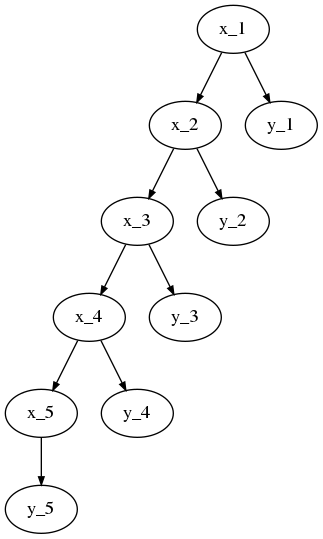

In [14]:
Image("HMM.png")

### 3. Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example “the distribution of the robot’s location two time steps later given its current position at time k” should be answered as $ p(x_{k+2} |x_k ). $

(a)   $ P \left (X_k \vert Y_{1..k} \right) $ is the distribution of the robot’s current position given the observations so far.<br>
(b)   $ P \left (X_k \vert Y_{1..K} \right) $ is the distribution of the robot’s position at time step k given all the observations.<br>
(c)   $ P \left (X_{k+1} \vert Y_{1..k} \right) $ is the distribution of the robot’s next position given the observations so far.<br>
(d)   $ P \left (Y_{k+1} \vert Y_{1..k} \right) $ is the distribution of the robot’s next sensor reading given the observations so far.<br>
(e)   $ P \left (X_{0} \vert Y_{1..k} \right) $ is the distribution of the robot’s initial position given observations so far.<br>
(f)   $ \arg\max_{X_{k}}{P\left (X_{k} \vert Y_{1..k} \right)} $ is the distribution of the most likely current position of the robot given the observations so far<br>
(g)   $ \arg\max_{X_{0..K}}{P\left (X_{0..K} \vert Y_{1..K} \right)} $ is the distribution of the most likely trajectory (Viterbi Path) taken by the robot from the start until now given the observations so far.<br>

## 4. Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings. Simulate a scenario for k=[1..100] with N = 50, $ \epsilon $ = 0.3, w = 0.8.

In [15]:
# Setting up the parameters
epsilon = 0.3
w = 0.8
N = 50
K = 100

State = state_model(N, epsilon) # state transition matrix 
# to get the robot to go clock wise all we have to do is use State.T instead of State
Observation = observation_model(N, w) # observation model matrix

p_x1 = np.ones(N)/N

In [16]:
def generate_hmm(state_model, observation_model, prior_x, N, K, verbose = True):
    state = np.zeros(K)
    obs = np.zeros(K)
        
    for k in range(K):
        if k == 0:
            state[k] = np.random.choice(np.arange(N), p = prior_x)
        else :
            state[k] = np.random.choice(np.arange(N), p = state_model[:, int(state[k-1])])
        obs[k] = np.random.choice(np.arange(N), p = observation_model[:, int(state[k])])
        if verbose : 
            print("**At step " + str(k+1) +" **")
            print("The position of the robot is : " + str(state[k]))
            print("The observation from the sensor is : " + str(obs[k]))
            print("*****************************")
        
    return obs, state

**At step 1 **
The position of the robot is : 1.0
The observation from the sensor is : 1.0
*****************************
**At step 2 **
The position of the robot is : 2.0
The observation from the sensor is : 2.0
*****************************
**At step 3 **
The position of the robot is : 3.0
The observation from the sensor is : 3.0
*****************************
**At step 4 **
The position of the robot is : 3.0
The observation from the sensor is : 3.0
*****************************
**At step 5 **
The position of the robot is : 3.0
The observation from the sensor is : 3.0
*****************************
**At step 6 **
The position of the robot is : 3.0
The observation from the sensor is : 3.0
*****************************
**At step 7 **
The position of the robot is : 4.0
The observation from the sensor is : 4.0
*****************************
**At step 8 **
The position of the robot is : 5.0
The observation from the sensor is : 5.0
*****************************
**At step 9 **
The position of t

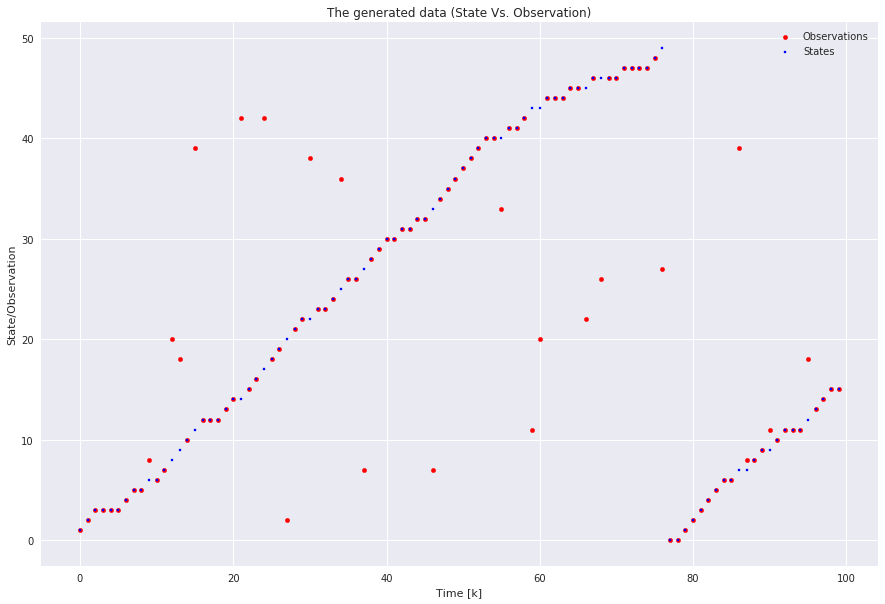

In [17]:
obs, state = generate_hmm(State, Observation, p_x1, N, K)

# Plotting the generate data
plt.figure(figsize=[15.0, 10.0])
plt.scatter(np.arange(K), obs, c='r', marker='o', s= 20)
plt.scatter(np.arange(K), state, c='b', marker=',', s=5)
plt.ylabel("State/Observation")
plt.xlabel("Time [k]")
plt.legend(["Observations","States"], loc = 1)
plt.title("The generated data (State Vs. Observation)")
plt.show()

## 5. Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: be careful with numerical stability! Modify the log-sum-exp trick for this algorithm)

In [18]:
# Generate new data for test
obs, state = generate_hmm(State, Observation, p_x1, N, K, verbose = False)

In [19]:
def plot_dists(N,K,alpha, true_y, epr=100, title=""):
    """
    This function plots the true_y which are the true positions of the robot(states)
    and then from the alpha array (which each of its columns describes the
    probability of the robot being at that position so alpha[i,k] is the probability of the robot being
    at position [i] at time [k])
    for each of its columns it draws at random based on those probabilities the position of the robot and 
    plot it.
    So the areas with darker red, represents the position at time[k] with the highest probability.
    """
    plt.figure(figsize=[15.0, 10.0])
    plt.scatter(np.arange(K), true_y, c='b', marker='X', s=50)
    for i in range(K):
        vals = []
        for k in range(epr):
            vals.append(np.random.choice(np.arange(N), p=alpha[:,i]))
        vals = np.array(vals)
        plt.scatter(np.ones(epr)*i, vals, alpha=0.2,c='r', marker=',', s=15)
    plt.xlabel("Time[k]")
    plt.ylabel("Observations/States")
    plt.legend(["True states", "Predictions"])
    plt.title(title)
    plt.show()
    return

<div class="alert alert-block alert-info">
<b>Tip:</b> This plot function is going to be used on multiple occasion later on in the notebook so to understand what it does, please read the comment included in the function.
</div>

#### Forward Pass

In [20]:
def normalize_col_exp(col):
    return np.exp(col) / np.sum(np.exp(col))

In [21]:
def state_predict(state_model, log_p):
    """
    Computes log(A*p)
    Inputs :
        state_model : State transition matrix
        log_p : log p(x_{k-1}, y_{1:k-1}) Filtered potential
    Outputs :
        lpp : log p(x_{k}, y_{1:k-1}); Predicted potential
    """
    v_max = np.max(log_p)
    p = np.exp(log_p - v_max)
    return np.log(state_model.dot(p)) + v_max

def state_update(observation_model, log_p):
    """
    State update in log domain
    Inputs :
        obs : p(y_k| x_k)
        log_p : log p(x_k, y_{1, k-1})
    Outputs :
        lup : log p(x_k, y_{1, k-1}) p(y_k| x_k)
    """
    return np.log(observation_model) + log_p

def forward_pass(N,K,prior_x, state_model, observation_model):
    log_alpha = np.zeros((N,K))
    log_alpha_predict = np.zeros((N, K))
    for k in range(K):
        if k == 0:
            log_alpha_predict[:,k] = np.log(prior_x)
        else :
            log_alpha_predict[:,k] = state_predict(state_model, log_alpha[:,k-1])
        log_alpha[:,k] = state_update(observation_model[int(obs[k]),:], log_alpha_predict[:,k])
    return log_alpha, log_alpha_predict

In [22]:
log_alpha, log_alpha_predict = forward_pass(N,K, p_x1, State, Observation)

In [23]:
log_alpha_normalized = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_alpha_predict)

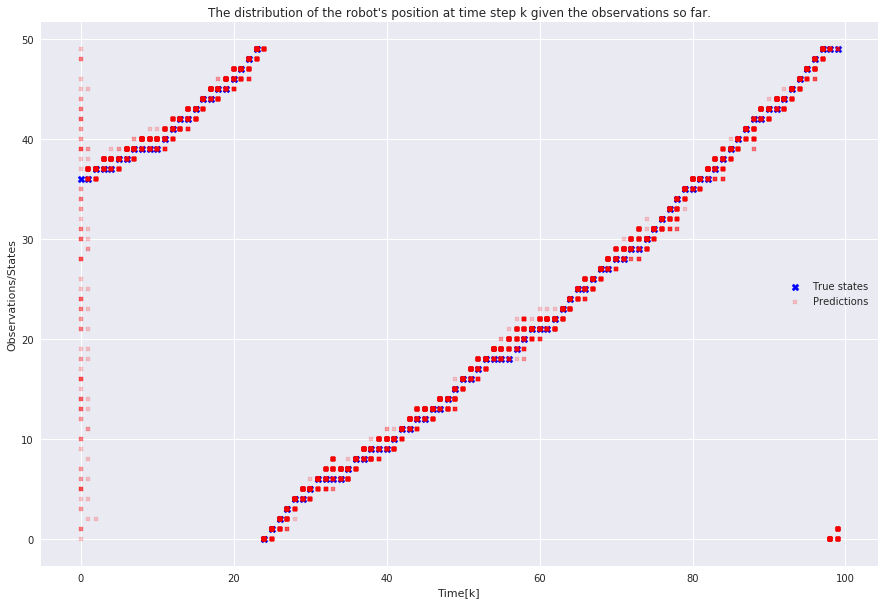

In [24]:
plot_dists(N,K, log_alpha_normalized,state, title="The distribution of the robot's position at time step k given the observations so far.")

#### Backward Pass

In [25]:
def state_postdict(state_model, log_p):
    """
    Computes A’*p in log domain
    Inputs :
        A : State transition matrix
        log_p : log p(y_{k+1:K}|x_{k+1}) Updated potential
    Outputs :
        lpp : log p(y_{k+1:K}| x_k) Postdicted potential
    """
    v_max = np.max(log_p)
    p = np.exp(log_p - v_max)
    return np.log(state_model.T.dot(p)) + v_max


def backward_pass(N,T, state_model, observation_model):
    log_beta = np.zeros((N,T))
    log_beta_postdict = np.zeros((N,T))
    for t in np.arange(T-1,0,-1):
        if t == T-1: 
            log_beta_postdict[:,t] = np.zeros(N)
        else :
            log_beta_postdict[:,t] = state_postdict(state_model, log_beta[:,t+1])
        log_beta[:,t] = state_update(observation_model[int(obs[t]),:], log_beta_postdict[:,t] )
    return log_beta, log_beta_postdict

In [26]:
log_beta, log_beta_postdict = backward_pass(N,K, State, Observation)

In [27]:
log_gamma = log_alpha + log_beta_postdict

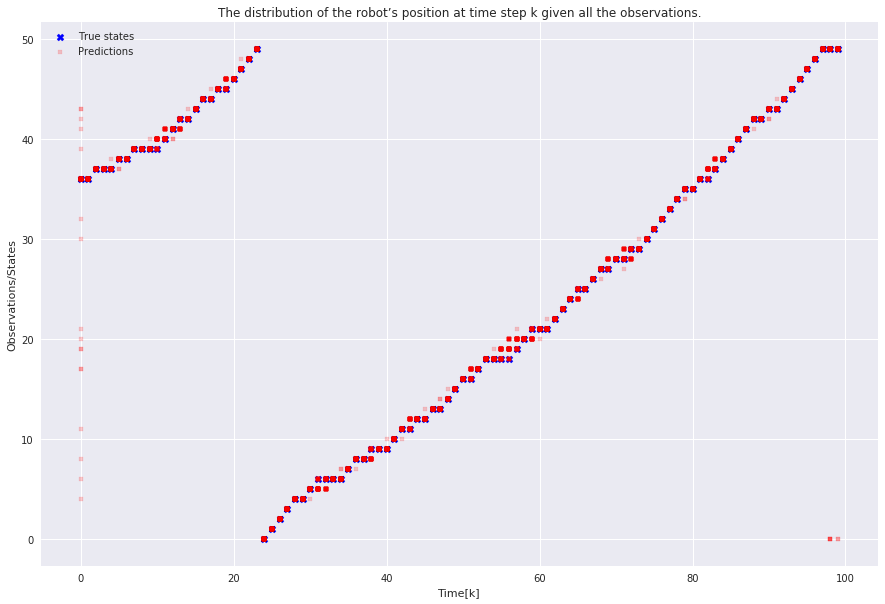

In [28]:
log_gamma_normalized = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_gamma)
plot_dists(N,K, log_gamma_normalized,state, title="The distribution of the robot’s position at time step k given all the observations.")

**The probability defined in 3(a) is as follow :** <br>
The distribution of the robot’s current position given the observations so far. <br><br>
$P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{k,k}(X_k) } $</br>

In [29]:
pk = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_alpha)
# For the time k = 10
# the distribution of the robot's position at time step k given the observations so far is equal to 
# pk[:,k]
# An example
t = 10
print(pk[:,t])
print("The most likely position of the robot is %d with a probability of %.2f %%" %( np.argmax(pk[:,t])+1 , np.max(pk[:,t]) *100 ))

[3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20
 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20
 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20
 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20
 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20 3.524e-20
 3.524e-20 4.374e-20 1.627e-13 1.550e-08 2.965e-01 6.953e-01 8.111e-03
 9.278e-05 1.066e-06 3.154e-13 3.522e-15 2.343e-19 3.524e-20 3.524e-20
 3.524e-20]
The most likely position of the robot is 41 with a probability of 69.53 %


**The probability defined in 3(b) is as follow :** <br>
The distribution of the robot’s position at time step k given all the observations.<br>

</br> 

$P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})}=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,Y_{1:k})}{P(Y_{1:K})}  =\frac{\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k)}{\sum_{X_k}P(X_kY_{1:K})}=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) }$

With:
$$\gamma_{k,k}(X_k)=\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k) $$
$$\log(\gamma_{k,k}(X_k))=\log(\alpha_{k/k}(X_k)) + \log(\beta_{k/k+1}(X_k))$$

In [30]:
pK = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_gamma)
# For the time k = 10
# the distribution of the robot's position at time step k given all the observations is equal to 
# pk[:,k]
# An example
t = 1
print(pK[:,t])

[5.775e-50 3.450e-51 3.153e-52 1.341e-53 1.429e-58 2.818e-61 9.776e-67
 1.205e-71 2.188e-74 1.169e-79 3.990e-83 5.341e-85 3.260e-90 1.278e-92
 4.478e-92 3.435e-91 1.726e-87 1.205e-80 2.120e-76 2.224e-74 1.283e-67
 1.319e-65 2.106e-63 6.724e-57 1.286e-52 6.667e-52 1.465e-50 7.485e-35
 2.612e-30 9.179e-24 1.629e-21 4.166e-19 3.683e-17 6.194e-13 1.083e-08
 9.467e-07 9.951e-01 4.880e-03 1.809e-12 1.900e-17 3.763e-24 1.590e-25
 1.547e-27 6.635e-29 6.835e-34 7.616e-39 1.583e-41 3.594e-43 7.745e-45
 1.670e-47]


**The probability defined in 3(f) is as follow :** <br>
the distribution of the most likely current position of the robot given the observations so far. <br><br>
$\arg\max_{X_k} P(X_k|Y_{1:k})$ = normalize_exp(np.argmax(log_gamma[:,k]))

In [31]:
print("The most likely position of the robot is %d with a probability of %.2f %%" %( np.argmax(pK[:,t])+1 , np.max(pK[:,t])*100  ))

The most likely position of the robot is 37 with a probability of 99.51 %


## 6. Assume now that at each step the robot can be kidnapped with probability κ. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new model with κ = 0.1. Can you reuse your code?

We can use the same code all we have to do is include a parameter kappa in the function that generates the state transition model.<br>
The state transition model will be defined as follows :<br><br>
$$
A = (1- \kappa ) * \quad
\begin{bmatrix} 
\epsilon & 0 & 0 & . & . & . & 1-\epsilon \\
1-\epsilon & \epsilon & 0 & . & . & . & 0 \\
0 & 1-\epsilon & \epsilon & 0 & . & . & 0 \\
0 & 0 &1-\epsilon & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
0 & . &.&.&0&1-\epsilon&\epsilon
\end{bmatrix} + \frac{\kappa}{N} \quad
\begin{bmatrix} 
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
1 & 1 & 1 & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 & 1 & . & . & . & 1 \\
\end{bmatrix}
$$

In [32]:
# Setting up the parameters
epsilon = 0.3
w = 0.8
N = 50
K = 100
kappa = .1

State_kappa = state_model(N, epsilon, kappa = kappa) # state transition matrix 
Observation = observation_model(N, w) # observation model matrix

p_x1 = np.ones(N)/N

In [33]:
State_kappa

array([[0.272, 0.002, 0.002, ..., 0.002, 0.002, 0.632],
       [0.632, 0.272, 0.002, ..., 0.002, 0.002, 0.002],
       [0.002, 0.632, 0.272, ..., 0.002, 0.002, 0.002],
       ...,
       [0.002, 0.002, 0.002, ..., 0.272, 0.002, 0.002],
       [0.002, 0.002, 0.002, ..., 0.632, 0.272, 0.002],
       [0.002, 0.002, 0.002, ..., 0.002, 0.632, 0.272]])

In [34]:
# Generate new data for test
obs, state = generate_hmm(State_kappa, Observation, p_x1, N, K, verbose=False)

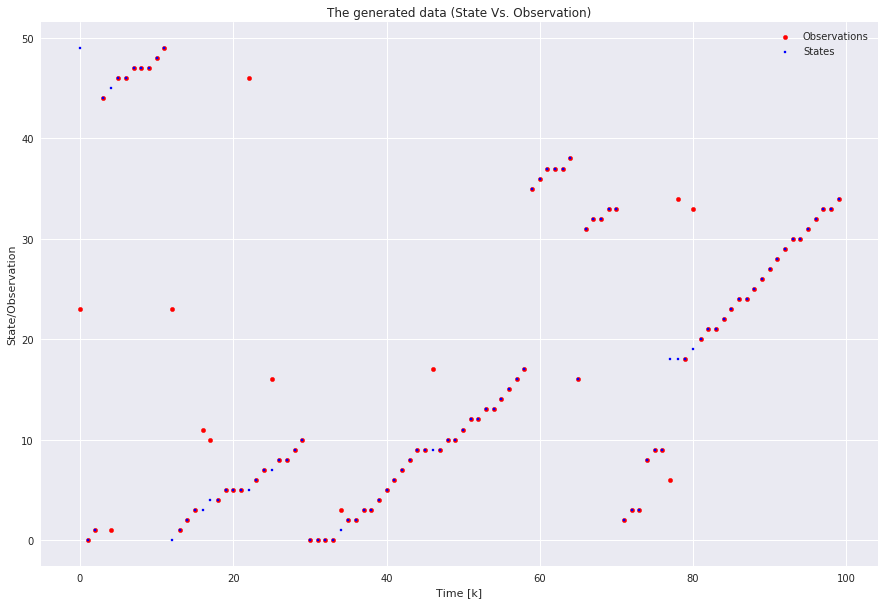

In [35]:
# Plotting the generate data for the new State_kappa
plt.figure(figsize=[15.0, 10.0])
plt.scatter(np.arange(K), obs, c='r', marker='o', s= 20)
plt.scatter(np.arange(K), state, c='b', marker=',', s=5)
plt.ylabel("State/Observation")
plt.xlabel("Time [k]")
plt.legend(["Observations","States"], loc = 1)
plt.title("The generated data (State Vs. Observation)")
plt.show()

<div class="alert alert-block alert-info">
<b>Observation:</b> Here we can see (when we follow the sates = real position of the robot) that there are several jumps in its trajectory. This is what the kappa factor introduces to the behaviour of the robot (randomness).
</div>

In [36]:
# Compute log_alpha and log_alpha_predict
# the distribution of the robot's position at time step k given the observations so far
log_alpha, log_alpha_predict = forward_pass(N,K, p_x1, State_kappa, Observation)
## Normalize the result
log_alpha_normalized = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_alpha_predict)

# Compute log_beta and log_beta_predict
log_beta, log_beta_postdict = backward_pass(N,K, State_kappa, Observation)
## Normalize the result
log_beta_normalized = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_beta_postdict)

# Compute Gamma
# The distribution of the robot’s position at time step k given all the observations.
log_gamma = log_alpha + log_beta_postdict
## Normalize the result
log_gamma_normalized = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_gamma)

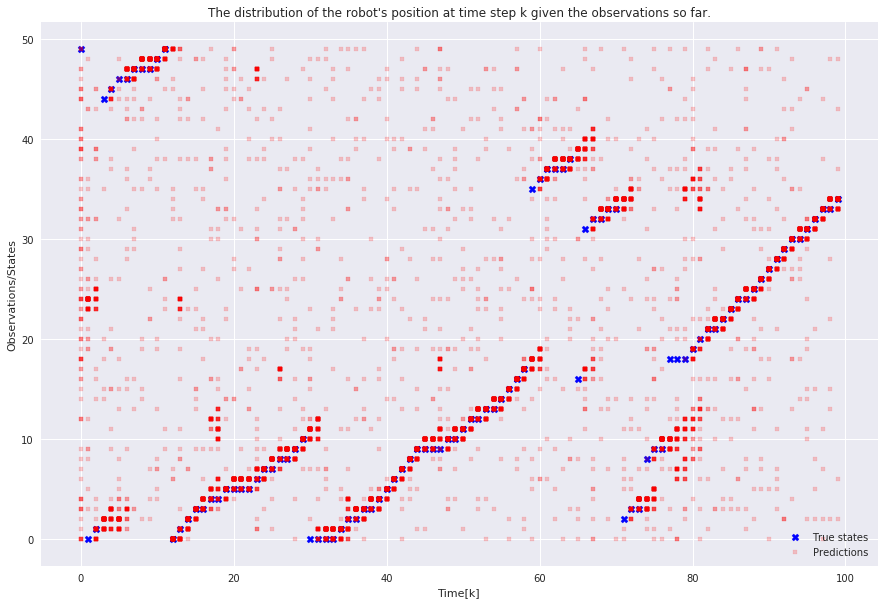

In [37]:
plot_dists(N,K, log_alpha_normalized,state, title="The distribution of the robot's position at time step k given the observations so far.")

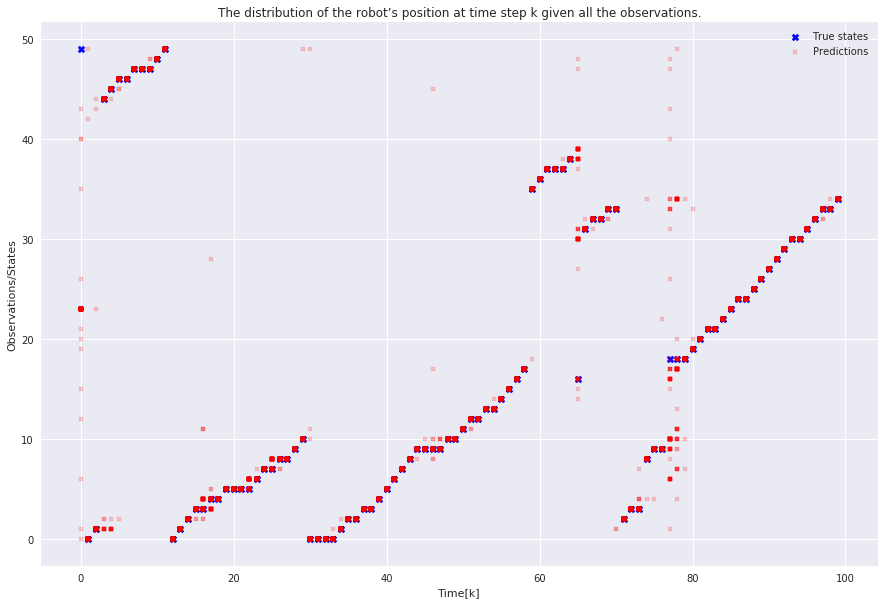

In [38]:
plot_dists(N,K, log_gamma_normalized,state, title="The distribution of the robot’s position at time step k given all the observations.")

**The probability defined in 3(a) is as follow :** <br>
The distribution of the robot’s current position given the observations so far. <br><br>
$P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{k,k}(X_k) } $</br>

In [39]:
pk = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_alpha)
# For the time k = 10
# the distribution of the robot's position at time step k given the observations so far is equal to 
# pk[:,k]
# An example
t = 4
print(pk[:,t])
print("The most likely position of the robot is %d with a probability of %.2f %%" %( np.argmax(pk[:,t])+1 , np.max(pk[:,t]) *100 ))

[2.852e-04 9.212e-01 2.023e-02 2.350e-02 2.762e-04 2.762e-04 2.762e-04
 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04
 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04
 2.762e-04 2.762e-04 2.779e-04 2.923e-04 3.327e-04 3.642e-04 3.275e-04
 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04
 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04 2.762e-04
 2.762e-04 2.762e-04 6.840e-03 1.559e-02 2.762e-04 2.762e-04 2.762e-04
 2.762e-04]
The most likely position of the robot is 2 with a probability of 92.12 %


**The probability defined in 3(b) is as follow :** <br>
The distribution of the robot’s position at time step k given all the observations.<br>

</br> 

$P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})}=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,Y_{1:k})}{P(Y_{1:K})}  =\frac{\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k)}{\sum_{X_k}P(X_kY_{1:K})}=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) }$

With:
$$\gamma_{k,k}(X_k)=\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k) $$
$$\log(\gamma_{k,k}(X_k))=\log(\alpha_{k/k}(X_k)) + \log(\beta_{k/k+1}(X_k))$$

In [40]:
pK = np.apply_along_axis(normalize_col_exp, axis=0, arr=log_gamma)
# For the time k = 10
# the distribution of the robot's position at time step k given all the observations is equal to 
# pk[:,k]
# An example
t = 2
print(pK[:,t])

[3.257e-03 9.673e-01 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05
 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05
 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05
 5.306e-05 5.306e-05 3.865e-04 1.609e-03 1.869e-03 5.306e-05 5.306e-05
 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05
 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05 5.306e-05
 5.396e-05 1.615e-02 7.018e-03 9.632e-05 5.923e-05 5.306e-05 5.306e-05
 1.043e-04]


**The probability defined in 3(f) is as follow :** <br>
the distribution of the most likely current position of the robot given the observations so far. <br><br>
$\arg\max_{X_k} P(X_k|Y_{1:k})$ = normalize_exp(np.argmax(log_gamma[:,k]))

In [41]:
print("The most likely position of the robot is %d with a probability of %.2f %%" %( np.argmax(pK[:,t])+1 , np.max(pK[:,t])*100  ))

The most likely position of the robot is 2 with a probability of 96.73 %
